# Problem statement


TechWorks Consulting is a consulting company that specializes in providing top-notch IT talent to a variety of businesses. The company is known for its
ability to quickly and efficiently find and place highly skilled IT professionals in a variety of positions. Primary objective is to Create a machine learning model which will help the company in determining the salary of newly hired employees using the given data.The Dataset conatins information about colleges, cities, roles,Graducation marks, previous experience and salary.

### Q1: Your views about the problem statement?
The problem statement revolves around creating a machine learning model to predict the salary of newly hired employees at TechWorks Consulting. It's an interesting problem that requires analyzing various factors such as college tier, city type, role, previous CTC, experience, academic record, etc., to predict the salary accurately. By solving this problem, TechWorks Consulting can streamline their hiring process and ensure fair compensation for their employees.

### Q2: What will be your approach to solving this task?
My approach would involve thorough data preprocessing, including handling missing values, outliers, and converting categorical variables into numerical format. Then, I'll explore different regression models and train them on the preprocessed data. Finally, I'll evaluate and compare the performance of these models to select the best one for predicting employee salaries.

### Q3: What were the available ML model options you had to perform this task?
The available ML model options for performing this task include Linear RegrRidge Regression and Lasso Regression,ession, Decision Tree Regression, Random Forest Regression, Gradient Boosting Regression.

#### Let's load and understand Data

In [32]:
#import all the required libraries
import pandas as pd

In [33]:
# Read all CSV file into a DataFrame
df = pd.read_csv('C:\\Users\\paliw\\Downloads\\ML case Study.csv')
college = pd.read_csv('C:\\Users\\paliw\\Downloads\\Colleges.csv')
cities = pd.read_csv('C:\\Users\\paliw\\Downloads\\cities.csv')

In [34]:
#overview
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10


In [35]:
college.head()

,Tier 1,Tier 2,Tier 3
0,IIT Bombay,IIIT Bangalore,"Ramaiah Institute of Technology, Bengaluru"
1,IIT Delhi,IIIT Delhi,TIET/Thapar University
2,IIT Kharagpur,IGDTUW,Manipal Main Campus
3,IIT Madras,NIT Calicut,VIT Vellore
4,IIT Kanpur,IIITM Gwalior,SRM Main Campus


In [36]:
#Extract data from college dataframe and store them in a sperate list
Tier1 = college["Tier 1"].tolist()
Tier2 = college["Tier 2"].tolist()
Tier3 = college["Tier 3"].tolist()
#tier mapping reflects the weightage assigned to each tier, with Tier1 having the highest weightage.
for item in df.College:
    if item in Tier1:
        df["College"].replace(item,3,inplace=True)
    elif item in Tier2:
        df["College"].replace(item,2,inplace=True)
    elif item in Tier3:
        df["College"].replace(item,1,inplace=True)

In [37]:
cities.head()

,Metrio City,non-metro cities
0,Mumbai,Dehradun
1,Delhi,Durgapur
2,Kolkata,Asansol
3,Chennai,Rourkela
4,Bangalore,Kozhikode


In [38]:
#Extract data from cities dataframe and store them in a sperate list
metro = cities['Metrio City'].tolist()
non_metro_cities = cities['non-metro cities'].tolist()
#Convert 'City' field into numerical data (0 for non-metro, 1 for metro)
for item in df.City:
    if item in metro:
        df['City'].replace(item,1,inplace=True)
    elif item in non_metro_cities:
        df['City'].replace(item,0,inplace=True)

#### Data exploration


In [39]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,0,Manager,55523.0,3,66,19,71406.58
1,2,0,Executive,57081.0,1,84,18,68005.87
2,1,0,Executive,60347.0,2,52,28,76764.02
3,1,0,Executive,49010.0,2,81,33,82092.39
4,3,0,Executive,57879.0,4,74,32,73878.10


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   int64  
 1   City                 1589 non-null   int64  
 2   Role                 1589 non-null   object 
 3   Previous CTC         1589 non-null   float64
 4   Previous job change  1589 non-null   int64  
 5   Graduation Marks     1589 non-null   int64  
 6   EXP (Month)          1589 non-null   int64  
 7   CTC                  1589 non-null   float64
dtypes: float64(2), int64(5), object(1)
memory usage: 99.4+ KB


In [41]:
df.describe()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,2.024544,0.514160,55518.453744,2.528634,59.855255,39.044682,75353.278798
std,0.838330,0.499957,6655.218445,1.123918,14.935139,14.108875,12587.288237
min,1.000000,0.000000,36990.000000,1.000000,35.000000,18.000000,53020.320000
25%,1.000000,0.000000,50518.000000,2.000000,46.000000,26.000000,66902.350000
50%,2.000000,1.000000,55291.000000,3.000000,60.000000,39.000000,73028.670000
75%,3.000000,1.000000,60109.000000,4.000000,73.000000,51.000000,80588.670000
max,3.000000,1.000000,77911.000000,4.000000,85.000000,64.000000,123416.990000


#### Data preporcessing
##### Convert Categorical Data : We have only one categorical field in our data set.I will use getdummies function to transform it into numerical filed.

In [42]:
df = pd.get_dummies(df, drop_first=True)
df = df.replace(True, 1)
df = df.replace(False ,0)

In [43]:
df.head()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
0,2,0,55523.0,3,66,19,71406.58,1
1,2,0,57081.0,1,84,18,68005.87,0
2,1,0,60347.0,2,52,28,76764.02,0
3,1,0,49010.0,2,81,33,82092.39,0
4,3,0,57879.0,4,74,32,73878.10,0


##### Outlier Detection and Treatment: Detect and handle outliers in the dataset, which could impact the model's accuracy.

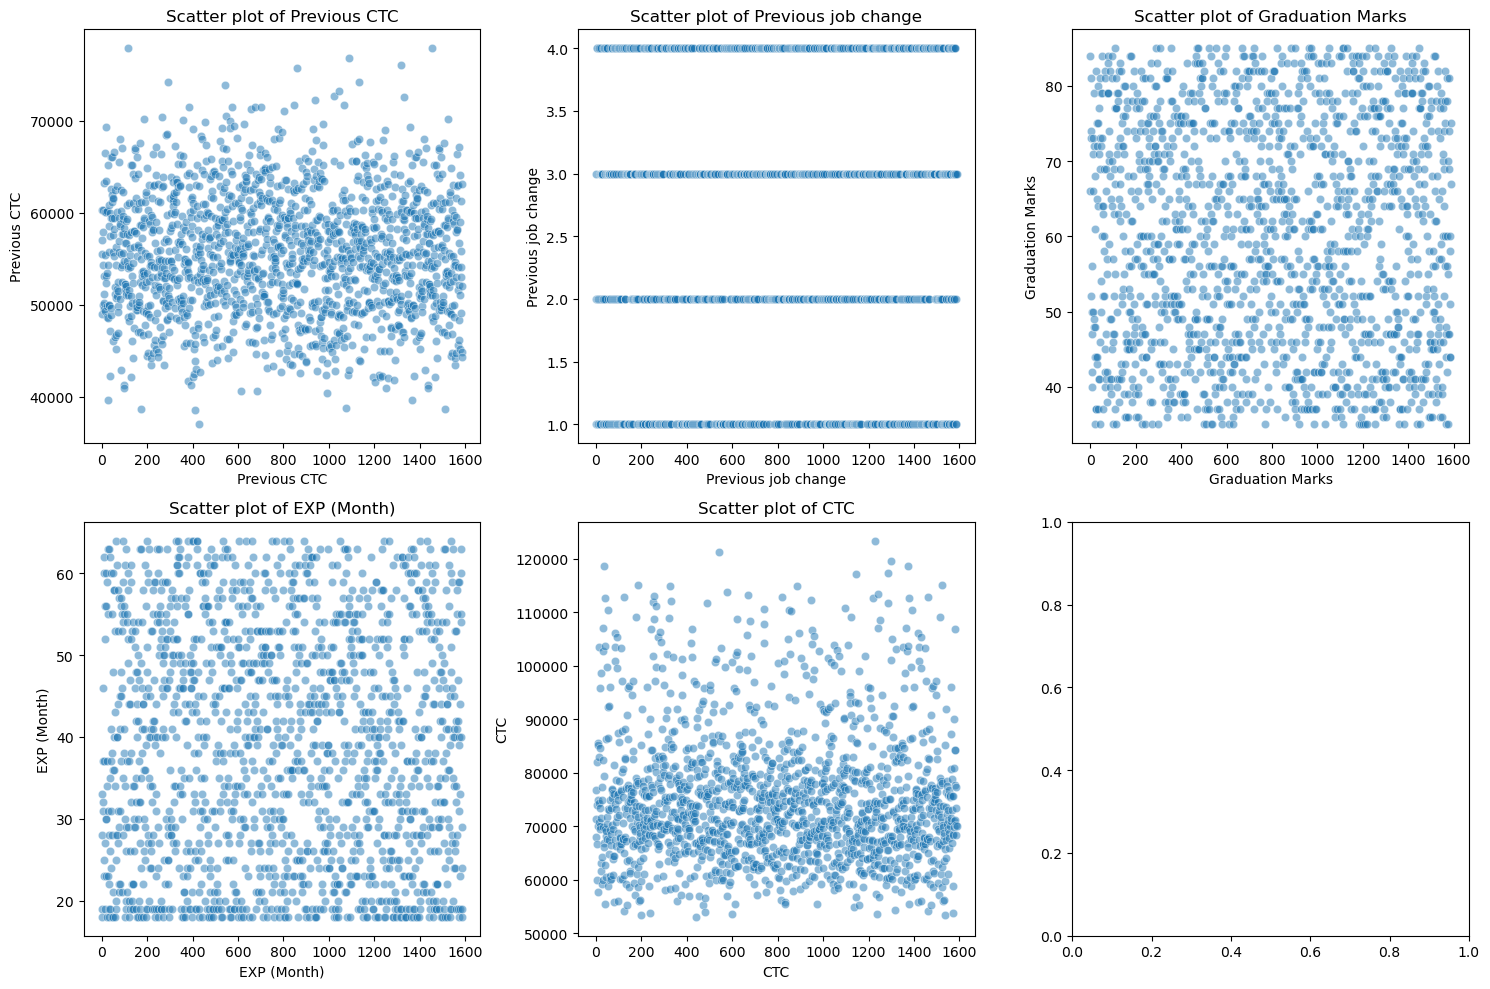

In [44]:
# Plot individual scatter plots
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting features for plotting
features = ['Previous CTC', 'Previous job change', 'Graduation Marks', 'EXP (Month)', 'CTC']

# Create a figure and axes
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Flatten the axes for easy iteration
axs = axs.flatten()

# Plot individual scatter plots
for i, feature in enumerate(features):
    sns.scatterplot(data=df[feature], ax=axs[i], alpha=0.5)
    axs[i].set_xlabel(feature)
    axs[i].set_title(f'Scatter plot of {feature}')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

##### from all the plots above we can analyse that we don't have outliers for any feature in our dataset. so we can simply move ahead in our dataset.

#### correlation matrix 
The correlation matrix and heatmap are essential tools in exploratory data analysis (EDA) as they provide insights into the relationships between variables in a dataset. Here's why they are important:<br>
1.Identifying Relationships<br>
2.Feature Selection<br>
3.Model Assumptions<br>
4.Insights for Decision Making<br>
5.Data Cleaning

<Axes: >

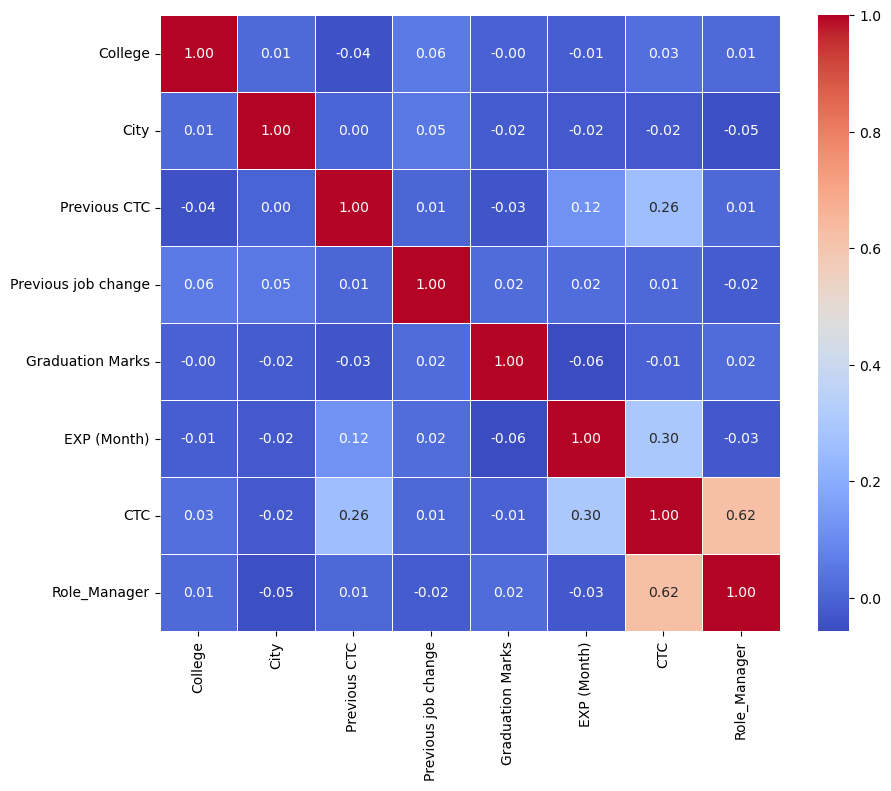

In [45]:
#let's plot heat map fopr correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()


# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)


##### from above heat map we can analyse our dependent variable "CTC" is highly correlated with "Role_maneger" and its significantly correlated with "EXP (MONTH)" and "previous CTC". For other independent variables we don't have significant correlation with our dependent variable but we will keep all of them in our analysis as we have limited number of vairables.After our analysis we can take a decision if we want to continue with these variables or not.

In [46]:
#defining our X(independent) and y(dependent) variables
X = df.loc[:, df.columns != 'CTC']
y = df['CTC']


#### Train test split
The train-test split is essential for ensuring that your machine learning model is robust, reliable, and capable of making accurate predictions on unseen data. It enables you to evaluate the model's performance, detect overfitting, and assess its ability to generalize to new observations.


In [47]:
from sklearn.model_selection import train_test_split
#These sets are split according to the specified test size, with 80% of the data used for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#### Performing Feature scaling on dataset
Feature scaling is a crucial step in many machine learning algorithms to ensure that all features contribute equally to the model fitting process.This process scales each feature independently to have a mean of 0 and a standard deviation of 1, which helps in improving the performance of many machine learning algorithms.

In [48]:
# Import Standard scaler from sklearn for feature scaling(mean=0, std dev=1)
from sklearn.preprocessing import StandardScaler
# Create standard scaler object
scaler = StandardScaler()
# Scale the features in the training data using a previously fitted scaler
X_train_s = scaler.fit_transform(X_train)

# Scale the features in the test data using the same scaler to ensure consistency
X_test_s = scaler.transform(X_test)


### Machine learning models
Now we are ready with our preprocessed data to train machine learning algorithms and decide with algorithm works best for our problem statement.<br>
I will here use some of the popular and effient machine learning models such as liner regression,decision tree regressor and random forest regression etc. After that we will compare performance of each model to analyse with model is best for us.<br>
<br>
<br>
#### 1.Simple linear regression
Simple linear regression is a statistical method used to model the relationship between a single independent variable (predictor) and a continuous dependent variable (response). It assumes that the relationship between the independent variable X and the dependent variable y can be approximated by a linear function.

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Initialize the linear regression model
model_simple_linear = LinearRegression()

# Train the model on the training data
model_simple_linear.fit(X_train_s, y_train)

# Make predictions on the testing data
y_pred_test = model_simple_linear.predict(X_test_s)
y_pred_train = model_simple_linear.predict(X_train_s)

# Calculate R^2 score
r2_simple_linear_test = r2_score(y_test, y_pred_test)
print("r2_simple_linear_test",r2_simple_linear_test)




r2_simple_linear_test 0.593351795838508


#### 2.Ridge Regression:
Ridge regression is a linear regression technique that adds a penalty term to the ordinary least squares (OLS) cost function. This penalty term is the sum of squared coefficients multiplied by a regularization parameter (α). Ridge regression shrinks the coefficients towards zero, which helps to mitigate the effects of multicollinearity and reduces overfitting.

#### 3.Lasso Regression:
Lasso regression (Least Absolute Shrinkage and Selection Operator) is similar to Ridge regression but uses the absolute values of the coefficients in the penalty term instead of squared values. Lasso regression not only shrinks the coefficients but can also set some of them to exactly zero, effectively performing feature selection.

Now, let's write a code to train Ridge and Lasso regression models using scikit-learn and use validation curves to find the best hyperparameter values.

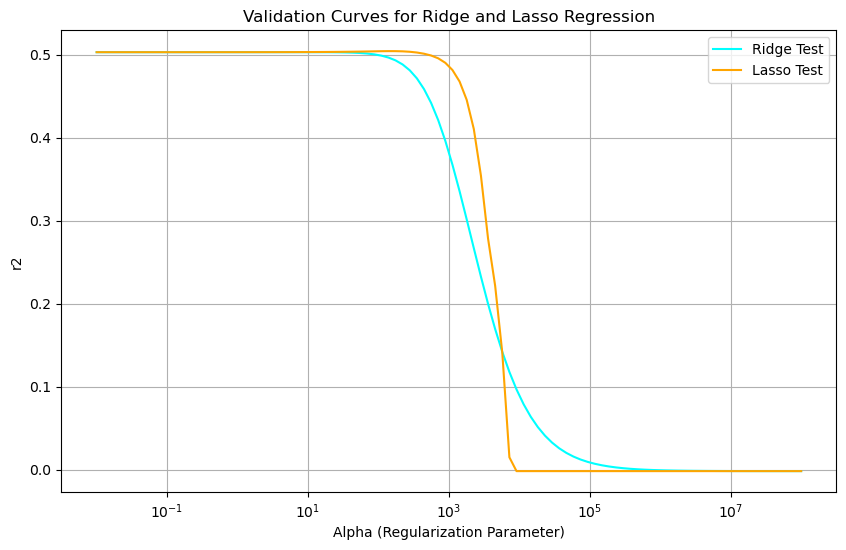

Best alpha value for Ridge: 6.7341506577508214
Best alpha value for Lasso: 138.48863713938718
R^2 score for Ridge Regression_test: 0.5924250044902091
R^2 score for Lasso Regression_test: 0.5892208565507875


In [50]:
import numpy as np
from sklearn.model_selection import validation_curve
from sklearn.linear_model import Ridge, Lasso

# Define a range of alpha values to test
alphas = np.logspace(-2, 8, 100)  

# Ridge Regression: Finding the best alpha value
ridge_train_scores, ridge_test_scores = validation_curve(
    Ridge(), X_train_s, y_train, param_name="alpha", param_range=alphas,
    scoring="r2", cv=5
)

# Lasso Regression: Finding the best alpha value
lasso_train_scores, lasso_test_scores = validation_curve(
    Lasso(), X_train_s, y_train, param_name="alpha", param_range=alphas,
    scoring="r2", cv=5
)

# Calculate mean of the cross-validated scores
ridge_mean_test_scores = np.mean(ridge_test_scores, axis=1)
lasso_mean_test_scores = np.mean(lasso_test_scores, axis=1)

# Plot validation curves
plt.figure(figsize=(10, 6))

plt.semilogx(alphas, ridge_mean_test_scores, label='Ridge Test', color='cyan')
plt.semilogx(alphas, lasso_mean_test_scores, label='Lasso Test', color='orange')

plt.title('Validation Curves for Ridge and Lasso Regression')
plt.xlabel('Alpha (Regularization Parameter)')
plt.ylabel('r2')
plt.legend()
plt.grid(True)
plt.show()

# Find the best alpha value for Ridge and Lasso
best_alpha_ridge = alphas[np.argmax(ridge_mean_test_scores)]
best_alpha_lasso = alphas[np.argmax(lasso_mean_test_scores)]

print("Best alpha value for Ridge:", best_alpha_ridge)
print("Best alpha value for Lasso:", best_alpha_lasso)

# Train Ridge regression with the best alpha
ridge_model = Ridge(alpha=best_alpha_ridge)
ridge_model.fit(X_train_s, y_train)

# Train Lasso regression with the best alpha
lasso_model = Lasso(alpha=best_alpha_lasso)
lasso_model.fit(X_train_s, y_train)

# Ridge regression R^2 score
ridge_r2_test = ridge_model.score(X_test_s, y_test)

# Lasso regression R^2 score
lasso_r2_test = lasso_model.score(X_test_s, y_test)

print("R^2 score for Ridge Regression_test:", ridge_r2_test)
print("R^2 score for Lasso Regression_test:", lasso_r2_test)


#### 4.DecisionTreeRegressor
A decision tree is one of the most powerful tools of supervised learning algorithms used for both classification and regression tasks. It builds a flowchart-like tree structure where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label. It is constructed by recursively splitting the training data into subsets based on the values of the attributes until a stopping criterion is met, such as the maximum depth of the tree or the minimum number of samples required to split a node.

In [51]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Initialize the Decision Tree Regressor
tree_reg = DecisionTreeRegressor()

# Define the hyperparameters grid to search
param_grid = {
    'max_depth' : [2,4,6], # Depth of the tree
    'min_samples_split': [2,4,6],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1,3,6]  # Minimum number of samples required at each leaf node
}

# Perform Grid Search CV to find the best hyperparameters
grid_search = GridSearchCV(tree_reg, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_s, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the Decision Tree Regressor with the best hyperparameters
best_tree_reg = DecisionTreeRegressor(**best_params)
best_tree_reg.fit(X_train_s, y_train)

# Make predictions on the testing set
y_pred = best_tree_reg.predict(X_test_s)

# Calculate R^2 score
r2_decision_test = r2_score(y_test, y_pred)
print("r2 score for decision tree regressor:", r2_decision_test)




Best Hyperparameters: {'max_depth': 4, 'min_samples_leaf': 6, 'min_samples_split': 2}
r2 score for decision tree regressor: 0.6004491930361671


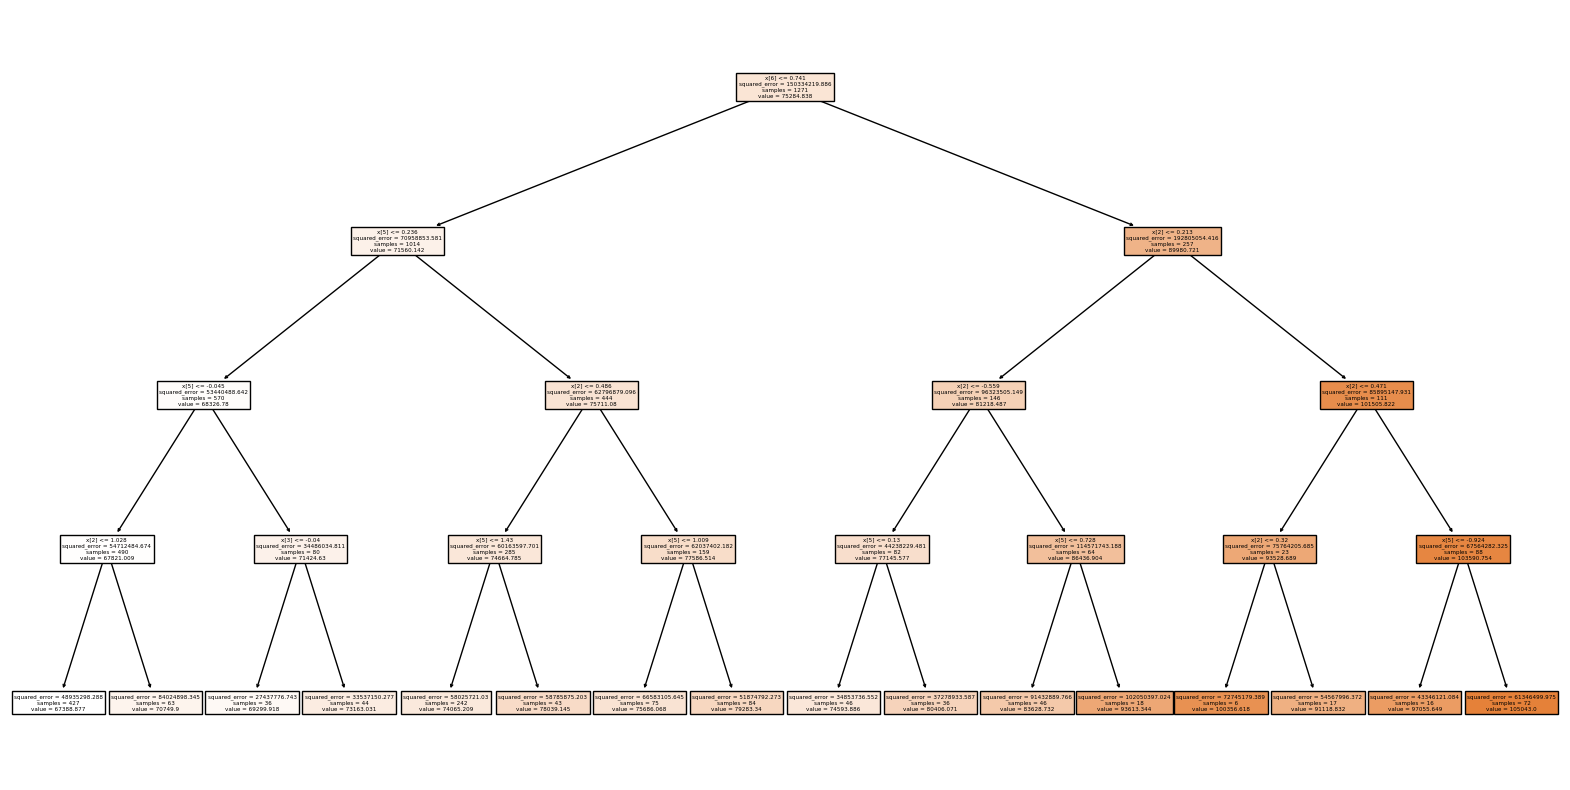

In [52]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
# Assuming 'model' is your trained decision tree model
plt.figure(figsize=(20,10))  # Adjust the figure size as needed
plot_tree(best_tree_reg, filled=True)
                                                             
plt.show()

#### 5.Random Forest:
Random Forest is an ensemble method that builds multiple decision trees during training and combines their predictions to make more accurate and robust predictions. Each decision tree in the forest is trained independently and makes its own prediction. The final prediction is typically the average (for regression)of the predictions of individual trees.

Random Forest tends to produce more accurate predictions compared to individual decision trees, especially when dealing with complex datasets with non-linear relationships between features and the target variable. By aggregating the predictions of multiple trees, Random Forest reduces variance and overfitting, leading to more robust models.

Random Forest provides a measure of feature importance, indicating the relative importance of each feature in making predictions. This can be helpful for feature selection and understanding the underlying relationships in the data.

In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Initialize the Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=1000, max_depth=4,
                               min_samples_split=6, min_samples_leaf=8)

# Train the Random Forest Regressor
rf_reg.fit(X_train_s, y_train)

# Make predictions on the testing set
y_pred = rf_reg.predict(X_test_s)

# Calculate R^2 score
r2_random_f_test = r2_score(y_test, y_pred)
print("r2 score for random forest regressor:", r2_random_f_test)




r2 score for random forest regressor: 0.6237634158642256


#### 6.XGBoost
XGBoost is a machine learning algorithm that belongs to the ensemble learning category, specifically the gradient boosting framework. It utilizes decision trees as base learners and employs regularization techniques to enhance model generalization. Known for its computational efficiency, feature importance analysis, and handling of missing values, XGBoost is widely used for tasks such as regression, classification, and ranking.

In [54]:
import xgboost as xgb
# Initialize XGBoost regressor

features = ['Previous CTC', 'Previous job change', 'Graduation Marks', 'EXP (Month)', 'CTC']

xgb_reg = xgb.XGBRegressor(n_estimators=1000, max_depth=6)

# Train the model
xgb_reg.fit(X_train_s, y_train)

# Make predictions on the testing set
y_pred = xgb_reg.predict(X_test_s)
r2_XG_test = r2_score(y_test, y_pred)
print("r2 score for XGboost:", r2_XG_test)




r2 score for XGboost: 0.6356338873701539


#### In XGBoost, feature importance represents the relative importance of each feature in making accurate predictions. XGBoost calculates feature importance based on how frequently a feature is used to split the data across all trees in the ensemble and how much each split improves the performance of the model.

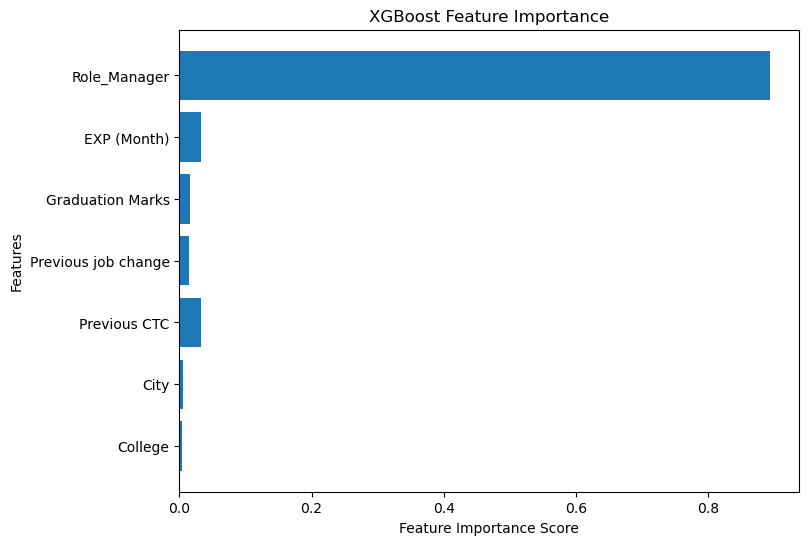

In [64]:
#Get feature importance scores
importance_scores = xgb_reg.feature_importances_

# Define feature names
feature_names = ['College',	'City',	'Previous CTC',	'Previous job change',	'Graduation Marks',	'EXP (Month)',	'Role_Manager']

# Plot feature importance with feature names
plt.figure(figsize=(8, 6))
plt.barh(range(len(importance_scores)), importance_scores, tick_label=feature_names)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('XGBoost Feature Importance')
plt.show()

### Q4:Which model’s performance is best and what could be the possible reason for that?

### Model comparison
Model comparison is crucial step in machine learning and data analysis.Model comparison involves assessing the performance of multiple models to determine which one best fits the data or achieves the desired objectives. There are several methods for comparing models, depending on the type of task (e.g., classification, regression) and the specific goals of the analysis. 

#### r2score
r2score is a common approach to evaluate the performance of regression models.It represents the proportion of the variance in the dependent variable that is predictable from the independent variables. A higher value indicates a better fit of the model to the data.


We have 6 different models to evalute, let's print r2 score for each of them to compare with one is best for our problem statement.

In [55]:
print("r2 simple_linear_test",r2_simple_linear_test)
print("r2 score for Ridge Regression_test:", ridge_r2_test)
print("r2 score for Lasso Regression_test:", lasso_r2_test)
print("r2 score for decision tree regressor:", r2_decision_test)
print("r2 score for random forest regressor:", r2_random_f_test)
print("r2 score for XGboost:", r2_XG_test)



r2 simple_linear_test 0.593351795838508
r2 score for Ridge Regression_test: 0.5924250044902091
r2 score for Lasso Regression_test: 0.5892208565507875
r2 score for decision tree regressor: 0.6004491930361671
r2 score for random forest regressor: 0.6237634158642256
r2 score for XGboost: 0.6356338873701539


#### Conclusion
from above r2 scores for different 6 models, we can conclude that:<br>
1. simple linear regression model is performing better than complex models such as Ridge and Lasso.If you have a small dataset for linear regression, you might encounter overfitting issues if you use overly complex models(such as Ridge or lasso).In such cases, it's generally better to choose simpler models with fewer parameters to prevent overfitting and ensure better generalization to unseen data.
2. Decision tree regressor have higher r2 score as compare to single linear regression model.They improve accuracy by focusing on essential features, simplifying models, handling non-linear relationships, and addressing multicollinearity.
3. The results from ensemble techniques like Random forest and XGboost are comparably high.ensemble techniques offer improved predictive performance, reduced overfitting, increased robustness, and flexibility across diverse modeling tasks. By combining multiple models, ensemble methods provide a powerful framework for addressing complex machine learning challenges and achieving superior results in various domains.
4. XG boost Regression model has best performance among all. There are several reasons for this:
   1. R2 score for XGBoost is highest.
   2. XGBoost in known for its computational efficiency.
   3. XGBoost is fast and highly accrurate and it can handle large dataset easily.
   4. XGBoost provides feature importance scores, which can be useful for feature selection and understanding the importance of different features in the model's predictions.


### Q5.What steps can you take to improve this selected model’s performance even further?

#### Tune Hyperparameters:
Perform a more thorough hyperparameter tuning by experimenting with different values for parameters like max_depth, min_samples_split, min_samples_leaf, and max_features.
#### Feature Selection: 
Consider removing or reducing the importance of less informative features to improve the model's efficiency and potentially its performance.As we have seen in correlation matrix that some of the features have correlation coefficient nearly 0. We can drop the features which are not relevant.
